# Guia da Camada de Transporte
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de transporte, além de suas funções e ferramentas.


In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

##### Instanciando a rede, e setando a topologia.

2024-08-16 11:58:20,950: Qubit 0 adicionado à memória do Host 0.
2024-08-16 11:58:20,951: Qubit 0 criado com fidelidade inicial 0.3699786760068696 e adicionado à memória do Host 0.
2024-08-16 11:58:20,952: Qubit 1 adicionado à memória do Host 0.
2024-08-16 11:58:20,952: Qubit 1 criado com fidelidade inicial 0.7932435773444613 e adicionado à memória do Host 0.
2024-08-16 11:58:20,953: Qubit 2 adicionado à memória do Host 0.
2024-08-16 11:58:20,954: Qubit 2 criado com fidelidade inicial 0.8010513219897764 e adicionado à memória do Host 0.
2024-08-16 11:58:20,955: Qubit 3 adicionado à memória do Host 0.
2024-08-16 11:58:20,957: Qubit 3 criado com fidelidade inicial 0.08774908576364515 e adicionado à memória do Host 0.
2024-08-16 11:58:20,957: Qubit 4 adicionado à memória do Host 0.
2024-08-16 11:58:20,958: Qubit 4 criado com fidelidade inicial 0.3482455423926457 e adicionado à memória do Host 0.
2024-08-16 11:58:20,958: Qubit 5 adicionado à memória do Host 0.
2024-08-16 11:58:20,959: Qubi

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


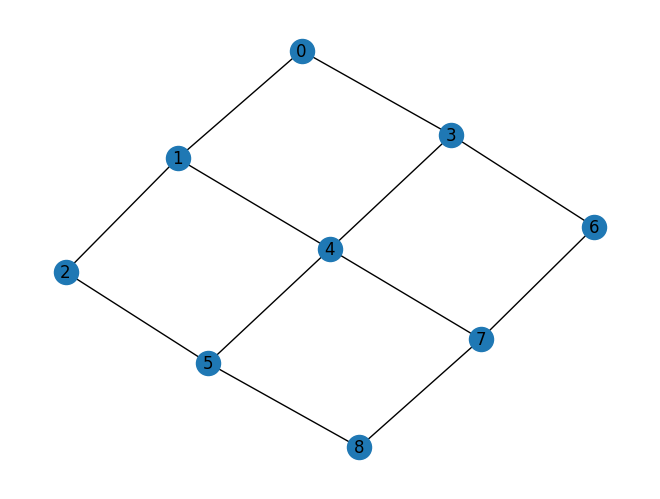

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente.

In [3]:
alice = rede.get_host(0)
bob = rede.get_host(8)

##### Verificação da memória de Alice e Bob.

In [4]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: [<quantumnet.objects.qubit.Qubit object at 0x0000021074D70490>, <quantumnet.objects.qubit.Qubit object at 0x000002107453E250>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5D490>, <quantumnet.objects.qubit.Qubit object at 0x0000021074082690>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5D6D0>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5E9D0>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5FE90>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5E090>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5E510>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5D5D0>]
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x000002107404D190>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D87F10>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D86B90>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D7EB10>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D87B50>, <quantumnet.objects

##### Nesse função, é enviado um request para a rede, solicitando uma rota para a transmissão de 2 qubits de Alice(0) para Bob(8).

In [5]:
rede.transportlayer.request_transmission(0,8, 2)

2024-08-16 11:58:22,233: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,234: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,235: Transmissão de 2 qubits entre 0 e 8 concluída com sucesso.


True

##### o protocolo de teletrnasporte realiza a transmissão de Alice para Bob.

In [6]:
rede.transportlayer.teleportation_protocol(0,8)

2024-08-16 11:58:22,249: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,250: Teletransporte de qubit de 0 para 8 foi bem-sucedido com fidelidade final de 0.14868992198075917.


True

In [7]:
print('memoria de alice:',(alice.memory))
print('memoria de bob:',(bob.memory))

memoria de alice: [<quantumnet.objects.qubit.Qubit object at 0x000002107453E250>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5D490>, <quantumnet.objects.qubit.Qubit object at 0x0000021074082690>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5D6D0>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5E9D0>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5FE90>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5E090>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5E510>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D5D5D0>]
memoria de bob: [<quantumnet.objects.qubit.Qubit object at 0x000002107404D190>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D87F10>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D86B90>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D7EB10>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D87B50>, <quantumnet.objects.qubit.Qubit object at 0x0000021074D84C90>, <quantumnet.objects

##### A função a seguir é chamada para que seja realizada a requesição de uma rota para que haja a transmissão de n qubits necessários. Ela vai executar toda a camada de transporte.

In [8]:
rede.transportlayer.run_transport_layer(0,8,5)

2024-08-16 11:58:22,272: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,273: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,274: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,274: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,275: Rota válida encontrada: [0, 3, 6, 7, 8]
2024-08-16 11:58:22,276: Teletransporte de qubit de 0 para 8 foi bem-sucedido com fidelidade final de 0.7554956751277464.
2024-08-16 11:58:22,276: Teletransporte de qubit de 0 para 8 foi bem-sucedido com fidelidade final de 0.046632666991583.
2024-08-16 11:58:22,277: Teletransporte de qubit de 0 para 8 foi bem-sucedido com fidelidade final de 0.026081479234997648.
2024-08-16 11:58:22,278: Teletransporte de qubit de 0 para 8 foi bem-sucedido com fidelidade final de 0.009177053105795767.
2024-08-16 11:58:22,279: Teletransporte de qubit de 0 para 8 foi bem-sucedido com fidelidade final de 0.3667314093621934.
2024-08-16 11:58:22,279: Transmissão e teletransporte de 5 qub

True

##### Essa função apresenta uma lista de métricas do transmissão dos qubits.

In [9]:
rede.transportlayer.get_teleported_qubits()

[{'route': [0, 3, 6, 7, 8], 'alice_id': 0, 'bob_id': 8},
 {'route': [0, 3, 6, 7, 8], 'alice_id': 0, 'bob_id': 8},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.3699786760068696,
  'fidelity_bob': 0.40188781576697774,
  'fidelity_route': 1.0,
  'F_final': 0.14868992198075917,
  'qubit_alice': <quantumnet.objects.qubit.Qubit at 0x21074d70490>,
  'qubit_bob': <quantumnet.objects.qubit.Qubit at 0x2107453e910>,
  'success': True},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.7932435773444613,
  'fidelity_bob': 0.9524132267883172,
  'fidelity_route': 1.0,
  'F_final': 0.7554956751277464,
  'qubit_alice': <quantumnet.objects.qubit.Qubit at 0x2107453e250>,
  'qubit_bob': <quantumnet.objects.qubit.Qubit at 0x2107404d190>,
  'success': True},
 {'alice_id': 0,
  'bob_id': 8,
  'route': [0, 3, 6, 7, 8],
  'fidelity_alice': 0.8010513219897764,
  'fidelity_bob': 0.058214331231299266,
  'fidelity_route': 1.0,
  'F_final': 0.0466